# ***Christopher Kennedy***
# ***Student ID: 109306056***
# ***AMS 595***
# ***Assignment 6***

## Part 1: Implementing Gradient Descent Algorithm

Given a function $f(x) = \sqrt{x^2+5}$, $x\in \mathbf{R}$.

Fact: This function is L-smooth.
0. Find the gradient of this function and the minimum value of this function analytically.


1. Plot this function over the interval $[-5, 5]$.
2. Perform the Gradient Descent algorithm to find the minimum value of $f$ for $50$ iterations ($T$) with a step size of $1$ ($\alpha$). Use the last digit of your SB ID divided by 5 and then plus 1 as the initial guess (for example, if your ID ends with 9, your initial guess $x_0$ will be $9\div5 + 1= 2.8$).
3. Record the values of $x_k$ at the $k$-th iteration during GD and report $x_T$.
4. Plot the value of $f(x_k)$ v.s. the iteration number $k$.
5. For each of the step sizes 5, 3, 1, and 0.5, perform gradient descent and record the values of $x_k$ in each step $k$. Plot $f(x_{k-1}) - f(x_{k})$ v.s. $k$ for each step size. Your graphs should all be included in a single plot. Examine if $f(x_{k-1}) - f(x_{k})$ (which means that $f(x_k)$ is always decreasing) is alway positive for all $k$.

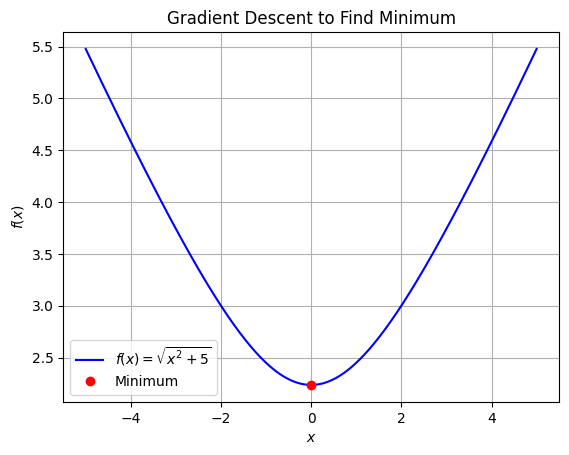

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x).
def f(x):
    return np.sqrt(x**2 + 5)

# Plot the function f(x), np.linspace might be helpful.
x_values = np.linspace(-5, 5, 400)
y_values = f(x_values)
plt.plot(x_values, y_values, 'b-', label="$f(x) = \sqrt{x^2 + 5}$")

min_x = 0 # The minimum is at x = 0
min_y = f(min_x)
plt.plot(min_x, min_y, 'ro', label="Minimum")

plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Gradient Descent to Find Minimum")
plt.legend()
plt.grid(True)
plt.show()

Value of x_T: 4.556057158298213e-13


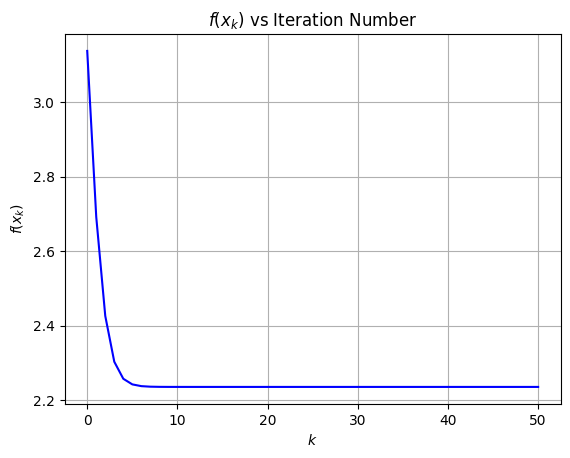

In [13]:
# Define the derivative of the function f(x), for gradient descent
def df(x):
    return x / np.sqrt(x**2 + 5)

# write a function to run the Gradient Descent Algorithm, take input arguments x_0, step_size, and num_iterations; return a list/array of x_k values.
def gradient_descent(x_0, step_size, num_iterations):
  x_k_values = [x_0]
  x_k = x_0
  for _ in range(num_iterations):
    x_k = x_k - step_size * df(x_k)
    x_k_values.append(x_k)
  return x_k_values

# set up/assign initial values
x_0 = 2.2 # Last digit of SB ID is 6; 6/5 + 1 = 2.2
step_size = 1
num_iterations = 50

# Run gradient descent by calling the function
x_k_values = gradient_descent(x_0, step_size, num_iterations)

# report x_T by printing out the value
print("Value of x_T:", x_k_values[-1])

# Plot the f(x_k) values vs. iteration number
f_x_k_values = [f(x_k) for x_k in x_k_values]
plt.plot(range(num_iterations + 1), f_x_k_values, 'b-', label="f(x_k) vs Iteration Number")
plt.xlabel("$k$")
plt.ylabel("$f(x_k)$")
plt.title("$f(x_k)$ vs Iteration Number")
plt.grid(True)
plt.show()

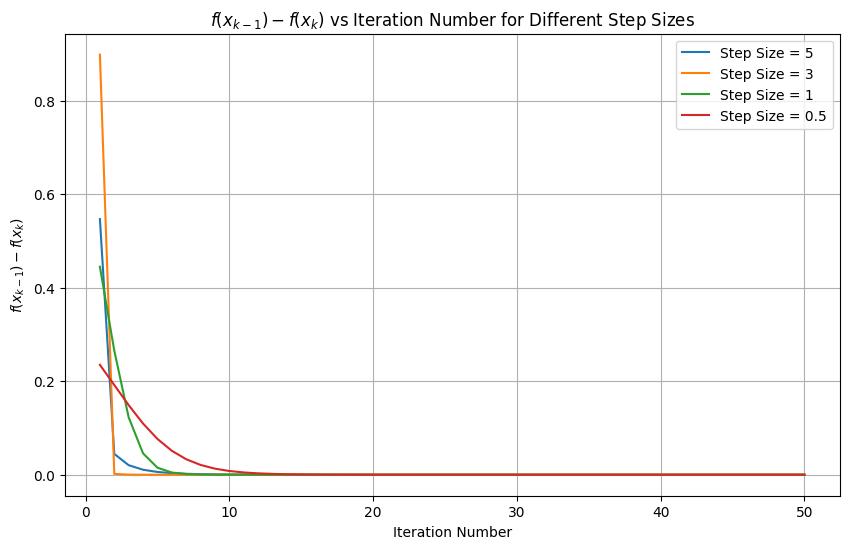

In [19]:
# create a list containing step sizes
step_sizes = [5, 3, 1, 0.5]

# initialize a list to store the results from different step sizes
results = []

# loop through the step sizes and perform GD and record results
for step_size in step_sizes:
    x_0 = 2.2 # Reset initial guess
    x_k_values = gradient_descent(x_0, step_size, num_iterations)
    results.append({step_size:x_k_values}) # append a dictionary containing the step_size and result

# plot multiple curves in a single graph
plt.figure(figsize=(10, 6))
for item in results: #loop through the results list
  for step_size, x_k_values in item.items(): #unpack the step_size and results
    f_x_k_values = [f(x_k) for x_k in x_k_values]
    f_diff = [f_x_k_values[i - 1] - f_x_k_values[i] for i in range(1, len(f_x_k_values))]
    plt.plot(range(1, len(f_diff) + 1), f_diff, label=f'Step Size = {step_size}')

plt.xlabel('Iteration Number')
plt.ylabel('$f(x_{k-1}) - f(x_k)$')
plt.title('$f(x_{k-1}) - f(x_k)$ vs Iteration Number for Different Step Sizes')
plt.legend()
plt.grid(True)
plt.show()

It appears that $f(x_{k-1}) - f(x_k)$ is always positive, which means that $f(x_k)$ is always decreasing. This is a good quality for our gradient descent to have.

## Part 2. Linear Regression with Numpy and Graphing with Matplotlib

In class, we implemented a linear regression model with one-dimensional features ( $x$-values). However, below, you will find the code for generating synthetic data where the features ( $x$-values) are now two-dimensional.

**Change the random seed to be the last two digits of your student ID. For example, if your ID is 123456987, change the random seed to be 87.**

The next step involves performing linear regression on this newly generated data. We will employ the normal equation, a topic covered in class, to determine the coefficients and intercept (weights and bias).

**Report the parameter values and plot the generated data and the regression plane (in 1D, we have a line, but in 2D, we have a plane).**


Theta values: [3.88395081 4.08662084 0.59418664]
Intercept: 3.883950807821914
Coefficients: [4.08662084 0.59418664]


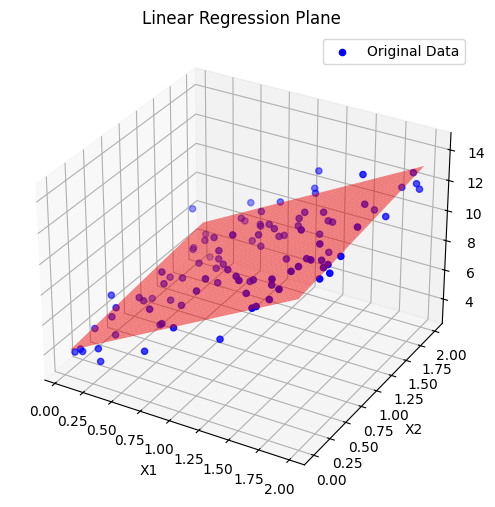

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(56)   # Last 2 digits of SB ID are 56
X = 2 * np.random.rand(100, 2)  # Generate 100 random 2D data points
y = 4 + 4 * X[:, 0] + 0.5 * X[:, 1] + np.random.randn(100)  # Generate y values with noise

# Add a column of ones to X for the bias terms (intercept) in the normal equation
X_bias = np.c_[np.ones((X.shape[0], 1)), X]

# Find theta using the normal equation
theta = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y)
print("Theta values:", theta)

# Print the intercept and coefficients of the regression plane
intercept = theta[0]
coefficients = theta[1:]
print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Plot the generated data and the regression plane
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)

X1, X2 = np.meshgrid(x1_range, x2_range)

y_mesh = intercept + coefficients[0] * X1 + coefficients[1] * X2

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='blue', label='Original Data')
ax.plot_surface(X1, X2, y_mesh, color='red', alpha=0.5,)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Linear Regression Plane')
ax.legend()
plt.show()

## 4. Logistic Regression with Numpy and Graphing with Matplotlib (20 pts)

In class, we implemented a logistic regression model to perform binary classification. Here, I provided the exact same code that we discussed in class, but the values for learning_rate and num_epochs are modified. I also removed all the comments. You task is to
1. Tune the Learning Rate and Number of Epochs: Your first task is to fine-tune the values for the learning_rate and num_epochs parameters. Your goal is to identify suitable values that will enable us to converge to a set of parameter values $\theta$ closely approximating the optimal parameter values $\theta^*$.
2. Code Explanation: To enhance code comprehension, please augment the code with meaningful comments. These comments should elucidate the purpose and functionality of each code segment, making it easier for readers to understand the logistic regression implementation.

By accomplishing these tasks, we aim to achieve a better understanding of the logistic regression model's behavior and its parameter optimization process.

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function: This function takes a value z and applies the logistic transformation.
def sigmoid(z):
    return 1 / (1 + np.exp(-z)) # Output values between 0 and 1

# Set up random seed for reproducibility
np.random.seed(595)

# Generate random data points (100 samples, each with 2 features)
X = np.random.rand(2, 100)

# Define the true weights and bias (used for generating target labels)
w_true = np.array([1.5, -2.5])
b_true = 1.0  # True bias

# Generate the probabilities using the true weights and bias, then create binary labels
probabilities = sigmoid(np.dot(w_true.T, X) + b_true)
Y = (probabilities > 0.5).astype(int) # Convert probabilities to binary labels

# Add noise to the data to simulate real-world conditions
X = X + 0.3 * np.random.rand(2, 100) - 0.1 * np.random.rand(2, 100)

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test = X[:,:80], X[:,80:]
Y_train, Y_test = Y[:80], Y[80:]

# Initialize weights and bias to zero
w = np.zeros(X.shape[0])
b = 0.0

# Hyperparameters: Learning rate and number of epochs. ADJUSTED FOR BETTER TRAINING
learning_rate = 0.1  # Set a smaller learning rate for better convergence
num_epochs = 1000  # Increase epochs for better convergence

# Training loop: Perform gradient descent for 'num_epochs' iterations
for epoch in range(num_epochs):
    # Compute predicted probablilities for the training set
    A_train = sigmoid(np.dot(w.T, X_train) + b)

    # Compute gradients for weights (dJ/dw) and bias (dJ/db)
    dJdw = np.dot(X_train, (A_train - Y_train).T) / len(Y_train)
    dJdb = np.mean(A_train - Y_train)

    # Update weights and bias using the gradient descent rule
    w -= learning_rate * dJdw
    b -= learning_rate * dJdb

# After training, make predictions on both training and test sets
A_train = sigmoid(np.dot(w.T, X_train) + b)
predictions_train = (A_train > 0.5).astype(int)  # Threshold at 0.5 for binary classification

A_test = sigmoid(np.dot(w.T, X_test) + b)
predictions_test = (A_test > 0.5).astype(int)

# Calculate the accuracy on training and test sets
train_accuracy = np.mean(predictions_train == Y_train)

test_accuracy = np.mean(predictions_test == Y_test)

# Output the results
print(f"Training Set Accuracy: {train_accuracy:.2f}")
print(f"Test Set Accuracy: {test_accuracy:.2f}")

Training Set Accuracy: 0.88
Test Set Accuracy: 1.00


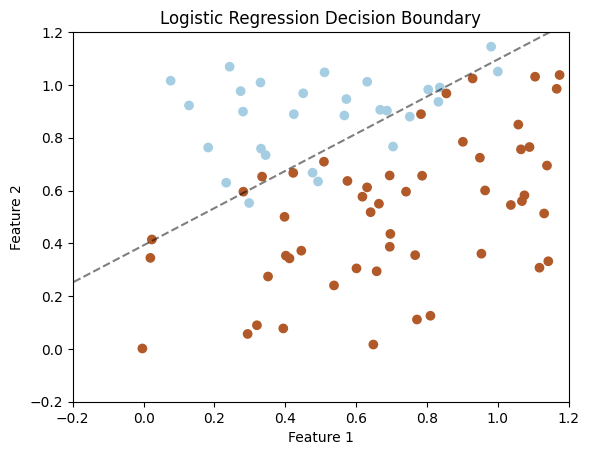

In [32]:
# Plotting the decision boundary for the training set
plt.scatter(X[0, :80], X[1,:80], c=Y[:80], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)  # Set axis limits for better visualization
plt.ylim(-0.2, 1.2)

# Get current axis limits
ax = plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a meshgrid for the decision boundary plot
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))

# Compute model predictions over the meshgrid points
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)  # Apply sigmoid to get probability values
Z = Z.reshape(xx.shape)  # Reshape to match meshgrid shape

# Plot the decision bounday (0.5 probability contour)
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])

# Add labels and titles
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

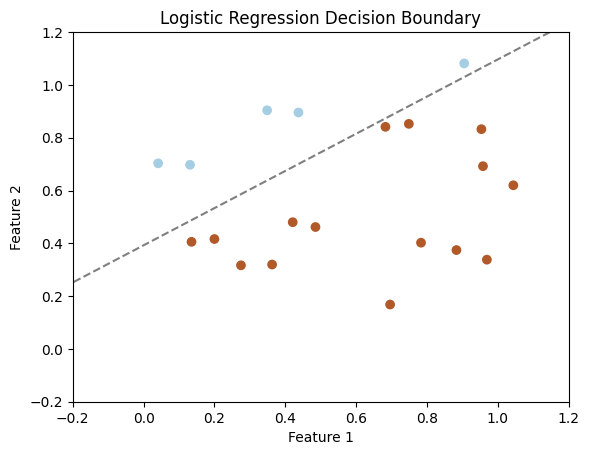

In [33]:
# Plotting the decision boundat for the test set (similar to the training set)
plt.scatter(X[0, 80:], X[1, 80:], c=Y[80:], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)

# Get current axis limits and create meshgrid for decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))

# Compute model predictions over the meshgrid points
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)

# Plot the decision bounday
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

## 5. Image Binary Classification (30 pts)



For Question 5 of the Python project, please complete it using two distinct Jupyter Notebook scripts. This entails using one notebook for the original dataset and another for the modified dataset. Consequently, you will be submitting a total of three .ipynb files as part of your Python project, ensuring clear separation and organization of your work.

Your tasks:
1. Your first task is to re-implement the classification model that was covered in our class. Please start from scratch and write the code independently. You can refer to the original code provided on Brightspace if you encounter any difficulties, but try to write the code on your own to reinforce your understanding.

2. After implementing the classification model, **report the indices of all the images in the test set for which the model's predictions are incorrect.** To maintain consistency with Python’s convention, please begin your indexing with 0. Additionally, **display the images of 4 of these failed cases for visual examination (you can display more if you like)**. This analysis might help us identify instances where the model is struggling in some applications.

3. Now you will modify the code to treat the dataset differently. The first 160 images plus the last digit of your Student ID will constitute the new training set, while the remaining images in the original training set will be your new test set. There are 209 images in the original training set. For example, if your ID ends with 0, the first 160 images will form your training set, and the remaining 49 images will be part of your test set. The test dataset is discarded and no longer used. Re-train the model using this modified dataset and **report the training and test accuracies**. Additionally, **provide the indices of all the images in the test set for which the model's predictions are incorrect. Display 4 of these misclassified images for further examination.**

By completing these tasks, you'll gain valuable insights into the classification model's performance and its behavior under different training and testing conditions.


  Datasets: [train]: train_catvnoncat.h5, [test]: test_catvnoncat.h5